In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rasterio.enums import Resampling

In [2]:
path = r"D:/GIS QSN 3"
os.chdir(path)

<h3>Step 1</h3>

In [3]:
# List the summer and winter files
summer_files = ["summer1_tir.tif", "summer2_tir.tif", "summer3_tir.tif"]
winter_files = ["cold1_tir.tif", "cold2_tir.tif", "cold3_tir.tif"]

# Load summer scenes
summer_scenes = []
for file in summer_files:
    with rasterio.open(file) as src:
        summer_scenes.append(src.read(1))  # Read the first band of the TIFF

# Load winter scenes
winter_scenes = []
for file in winter_files:
    with rasterio.open(file) as src:
        winter_scenes.append(src.read(1))  # Read the first band of the TIFF

In [4]:
# Normalize the summer and winter scenes
summer_scenes_normalized = [(scene - np.min(scene)) / (np.max(scene) - np.min(scene)) for scene in summer_scenes]
winter_scenes_normalized = [(scene - np.min(scene)) / (np.max(scene) - np.min(scene)) for scene in winter_scenes]

**Summer Mean Values: The mean of the summer scenes represents the average vegetation health or surface reflectance for the summer season. A higher value would indicate more vegetation or higher reflectance (depending on the index used).**

**Winter Mean Values: The mean of the winter scenes indicates the same, but for the winter season. Typically, there may be less vegetation in winter, leading to lower mean values for vegetation indices like NDVI.**

**This approach will help you understand how the mean values change between the warm (summer) and cold (winter) seasons. If the data is related to vegetation (e.g., NDVI), the summer season will likely have higher mean values due to more vegetation, while the winter season will have lower mean values.**

In [5]:
# Compute mean for summer and winter scenes
summer_means = [np.nanmean(scene) for scene in summer_scenes_normalized]
winter_means = [np.nanmean(scene) for scene in winter_scenes_normalized]

# Calculate the overall mean for summer and winter
overall_summer_mean = np.nanmean(summer_means)
overall_winter_mean = np.nanmean(winter_means)

print("Summer Mean Values:", summer_means)
print("Winter Mean Values:", winter_means)

print("Overall Summer Mean:", overall_summer_mean)
print("Overall Winter Mean:", overall_winter_mean)

Summer Mean Values: [0.5131823639744214, 0.4729677364949431, 0.5379085150504306]
Winter Mean Values: [0.4335495162837851, 0.430448770625263, 0.5104239113380101]
Overall Summer Mean: 0.5080195385065983
Overall Winter Mean: 0.45814073274901945


<h3>Step 2</h3>

**Standard Deviation for Summer: The standard deviation for each summer scene indicates how much the values (e.g., reflectance or vegetation index) vary from the mean within that scene. A higher standard deviation in summer might indicate more variability in vegetation health, land cover types, or surface reflectance. This could be due to diverse land cover types or varying vegetation conditions.**

**Standard Deviation for Winter: In winter, the standard deviation might be smaller or larger depending on the land cover and conditions. For example, a low standard deviation in winter might indicate that most of the area is covered by snow or bare land (low variability), while a higher standard deviation could indicate more variability in conditions such as urban areas or semi-vegetated regions.**

**Higher Standard Deviation: A higher standard deviation indicates that the values (reflectance, vegetation indices) are spread out more from the mean, which suggests greater variability within the image scene.**

**Lower Standard Deviation: A lower standard deviation indicates that the values are more consistent and clustered around the mean, which might suggest uniformity in land cover (e.g., a large area of water or bare soil).**

**By calculating the standard deviation for both the summer and winter scenes, you can assess how much the surface conditions change between these two seasons and whether there is greater or less variability in either season.** 

In [6]:
# Compute standard deviation for summer and winter scenes
summer_stdevs = [np.nanstd(scene) for scene in summer_scenes_normalized]
winter_stdevs = [np.nanstd(scene) for scene in winter_scenes_normalized]

# Calculate the overall standard deviation for summer and winter
overall_summer_stdev = np.nanstd(summer_stdevs)
overall_winter_stdev = np.nanstd(winter_stdevs)

# Print the standard deviations for each scene
print("Summer Standard Deviations:", summer_stdevs)
print("Winter Standard Deviations:", winter_stdevs)

# Print the overall standard deviation for the summer and winter
print("Overall Summer Standard Deviation:", overall_summer_stdev)
print("Overall Winter Standard Deviation:", overall_winter_stdev)

Summer Standard Deviations: [0.3639461942993482, 0.3347767527869939, 0.3696128743103447]
Winter Standard Deviations: [0.3211268350389897, 0.2975968737042087, 0.3498664243822672]
Overall Summer Standard Deviation: 0.015262601144552822
Overall Winter Standard Deviation: 0.021374255033470763


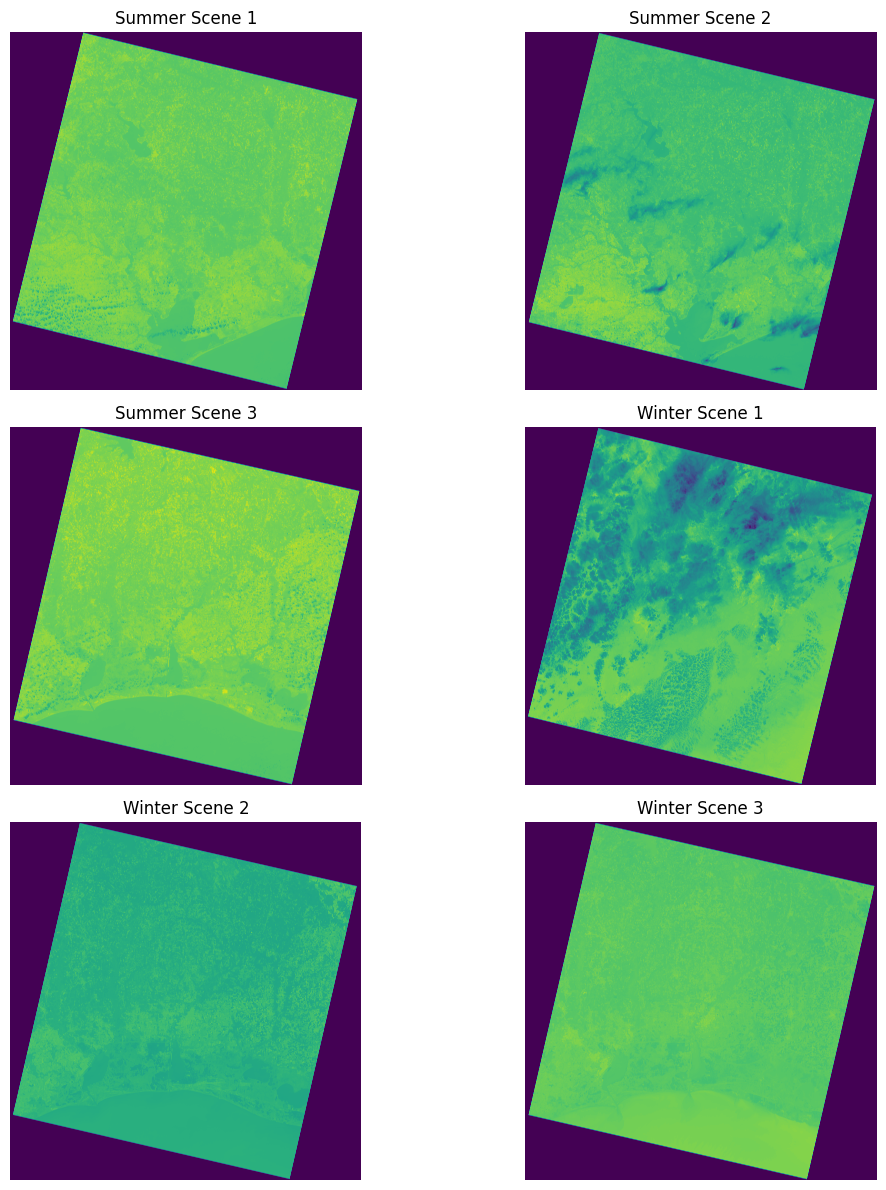

In [21]:
# List of summer and winter file names
summer_files = ["summer1_tir.tif", "summer2_tir.tif", "summer3_tir.tif"]
winter_files = ["cold1_tir.tif", "cold2_tir.tif", "cold3_tir.tif"]

# Load summer scenes
summer_scenes = []
for file in summer_files:
    with rasterio.open(file) as src:
        summer_scenes.append(src.read(1))  # Read the first band of the TIFF

# Load winter scenes
winter_scenes = []
for file in winter_files:
    with rasterio.open(file) as src:
        winter_scenes.append(src.read(1))  # Read the first band of the TIFF 

# Set up the figure for plotting
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Create a 3x2 grid for 6 plots
axes = axes.flatten()  # Flatten to make indexing easier

# Plot Summer scenes
for i, summer_scene in enumerate(summer_scenes):
    axes[i].imshow(summer_scene, cmap='viridis')
    axes[i].set_title(f"Summer Scene {i+1}")
    axes[i].axis('off')  # Hide axes

# Plot Winter scenes
for i, winter_scene in enumerate(winter_scenes):
    axes[i+3].imshow(winter_scene, cmap='viridis')
    axes[i+3].set_title(f"Winter Scene {i+1}")
    axes[i+3].axis('off')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

<h3>Step 3</h3>

**Resampling:
The script explicitly reads the dimensions, CRS, and transform of the summer files.
Each winter file is resampled to match the summer file using Resampling.bilinear.**

**Pixel Comparison:
Each pair of summer and resampled winter files is compared using np.isclose.
Similar pixels are counted and displayed along with the total number of pixels and the percentage similarity.**

**Simplified Structure:
No functions are used; the steps are performed in a straightforward and repetitive manner for each file.**

In [8]:
# File paths
summer_files = ["summer1_tir.tif", "summer2_tir.tif", "summer3_tir.tif"]
winter_files = ["cold1_tir.tif", "cold2_tir.tif", "cold3_tir.tif"]
resampled_winter_files = ["cold1_resampled.tif", "cold2_resampled.tif", "cold3_resampled.tif"]

In [9]:
# Resample winter files to match summer files
for i in range(len(winter_files)):
    summer_file = summer_files[i]
    winter_file = winter_files[i]
    resampled_file = resampled_winter_files[i]

    with rasterio.open(summer_file) as summer_src:
        summer_transform = summer_src.transform
        summer_crs = summer_src.crs
        summer_shape = summer_src.shape

    with rasterio.open(winter_file) as winter_src:
        winter_data = winter_src.read(
            out_shape=(winter_src.count, summer_shape[0], summer_shape[1]),
            resampling=Resampling.bilinear,
        )
        winter_meta = winter_src.meta.copy()
        winter_meta.update({
            "driver": "GTiff",
            "height": summer_shape[0],
            "width": summer_shape[1],
            "transform": summer_transform,
            "crs": summer_crs,
        })

        with rasterio.open(resampled_file, "w", **winter_meta) as dst:
            dst.write(winter_data)

In [10]:
# Compare pixels between resampled winter and summer files
for i in range(len(summer_files)):
    summer_file = summer_files[i]
    resampled_file = resampled_winter_files[i]

    with rasterio.open(summer_file) as summer_src, rasterio.open(resampled_file) as winter_src:
        summer_data = summer_src.read(1)
        winter_data = winter_src.read(1)

        # Find similar pixels
        similar_pixels = np.isclose(summer_data, winter_data, atol=10)  # Adjust `atol` if needed
        similar_pixel_count = np.sum(similar_pixels)
        total_pixels = summer_data.size

        print(f"File pair {summer_file} and {resampled_file}:")
        print(f"Similar Pixels: {similar_pixel_count}")
        print(f"Total Pixels: {total_pixels}")
        print(f"Percentage Similar: {similar_pixel_count / total_pixels * 100:.2f}%\n")

File pair summer1_tir.tif and cold1_resampled.tif:
Similar Pixels: 20208332
Total Pixels: 60929411
Percentage Similar: 33.17%

File pair summer2_tir.tif and cold2_resampled.tif:
Similar Pixels: 29335015
Total Pixels: 60773391
Percentage Similar: 48.27%

File pair summer3_tir.tif and cold3_resampled.tif:
Similar Pixels: 19044224
Total Pixels: 59763461
Percentage Similar: 31.87%



<h3>Step 4</h3>

**Data Reading:
Summer and corresponding resampled winter files are read in pairs.
rasterio.open reads the first band (assumes a single-band TIF file).**

**Compute Differences:
The difference for each pixel is calculated: difference = summer_data - winter_data.
Differences from all file pairs are flattened and combined into a single array using np.concatenate.**

**Compute Statistics:
Mean Difference: Average of the differences across all pixels.**

**Variance: 
Variance of the differences, which measures the spread.**

**Output:
Prints the mean and variance of the differences.**

In [11]:
# File paths
summer_files = ["summer1_tir.tif", "summer2_tir.tif", "summer3_tir.tif"]
winter_files = ["cold1_resampled.tif", "cold2_resampled.tif", "cold3_resampled.tif"]

# Initialize arrays to store results
differences = []

# Compute the difference for each pair of files
for i in range(len(summer_files)):
    summer_file = summer_files[i]
    winter_file = winter_files[i]

    with rasterio.open(summer_file) as summer_src, rasterio.open(winter_file) as winter_src:
        summer_data = summer_src.read(1)  # Read summer scene
        winter_data = winter_src.read(1)  # Read resampled winter scene

        # Compute the difference
        difference = summer_data - winter_data
        differences.append(difference)

# Combine all differences into a single array
all_differences = np.concatenate([diff.flatten() for diff in differences])

# Compute statistics
mean_difference = np.mean(all_differences)
variance_difference = np.var(all_differences)

# Print results
print(f"Average Difference Between Summer and Winter: {mean_difference:.2f}")
print(f"Variance of Differences: {variance_difference:.2f}")

Average Difference Between Summer and Winter: 45.96
Variance of Differences: 2453.02


**Average Difference (45.96):
This value indicates the mean change in pixel values (e.g., temperature, reflectance, or another index) between summer and winter seasons.
If the dataset represents thermal infrared (TIR) data or indices related to temperature, a difference of ~46 can be expected due to seasonal temperature variations. Summers are typically warmer, so pixel values are higher.
It also depends on the unit scale (e.g., raw reflectance or scaled temperature). If the values are in scaled units (like 10s or 100s), a difference of 45.96 is plausible.**

**Variance of Differences (2453.02):
Variance measures the spread of differences between the two datasets. A high variance suggests significant variability in how pixel values differ across the scenes.
For example, some areas (e.g., water bodies or shaded regions) might show smaller seasonal changes, while others (e.g., urban or barren areas) might exhibit larger differences.
If your data covers diverse land types (e.g., vegetation, water, urban areas), high variance is expected due to differing seasonal responses.**

<h3>Step 5</h3>

**Dynamic Indices:
The most dynamic index corresponds to the scene with the highest average difference between summer and winter.
The least dynamic index has the smallest average difference.**

**Spatial Variability:
The greatest spatial variability corresponds to the scene with the highest variance in pixel differences.
The least spatial variability has the lowest variance.**

**Why?:
Dynamic indices show significant changes due to environmental or seasonal factors (e.g., temperature changes or vegetation dynamics).
Greater spatial variability indicates a diverse area (e.g., mixed land cover types with varying responses).**

In [13]:
# File paths
summer_files = ["summer1_tir.tif", "summer2_tir.tif", "summer3_tir.tif"]
winter_files = ["cold1_resampled.tif", "cold2_resampled.tif", "cold3_resampled.tif"]

In [14]:
# Initialize lists for storing statistics
average_differences = []
variances = []

In [15]:
# Process each pair of summer and winter files
for summer, winter in zip(summer_files, winter_files):
    with rasterio.open(summer) as summer_src, rasterio.open(winter) as winter_src:
        # Read the first band from each file
        summer_data = summer_src.read(1).astype(float)
        winter_data = winter_src.read(1).astype(float)

        # Compute the pixel-wise difference
        difference = summer_data - winter_data

        # Compute statistics
        avg_diff = np.mean(difference)
        var_diff = np.var(difference)

        # Store the results
        average_differences.append(avg_diff)
        variances.append(var_diff)

        # Print statistics for each scene
        print(f"Scene {summer} vs {winter}:")
        print(f"  Average Difference: {avg_diff:.2f}")
        print(f"  Variance of Difference: {var_diff:.2f}")
        print()

Scene summer1_tir.tif vs cold1_resampled.tif:
  Average Difference: 69.28
  Variance of Difference: 2709.00

Scene summer2_tir.tif vs cold2_resampled.tif:
  Average Difference: 10.81
  Variance of Difference: 589.98

Scene summer3_tir.tif vs cold3_resampled.tif:
  Average Difference: 41.72
  Variance of Difference: 932.50



In [16]:
# Summary
most_dynamic_index = np.argmax(average_differences) + 1
least_dynamic_index = np.argmin(average_differences) + 1
most_variable_index = np.argmax(variances) + 1
least_variable_index = np.argmin(variances) + 1

print("Summary:")
print(f"Most dynamic index: Scene {most_dynamic_index} (Highest average difference: {max(average_differences):.2f})")
print(f"Least dynamic index: Scene {least_dynamic_index} (Lowest average difference: {min(average_differences):.2f})")
print(f"Greatest spatial variability: Scene {most_variable_index} (Highest variance: {max(variances):.2f})")
print(f"Least spatial variability: Scene {least_variable_index} (Lowest variance: {min(variances):.2f})")

Summary:
Most dynamic index: Scene 1 (Highest average difference: 69.28)
Least dynamic index: Scene 2 (Lowest average difference: 10.81)
Greatest spatial variability: Scene 1 (Highest variance: 2709.00)
Least spatial variability: Scene 2 (Lowest variance: 589.98)
